# Feature Engineering

Workflow:

- Handle Numerical Features:
1. Outliers removal: use Winsorizing
2. Feature transformation: use Log normalization for skewed features
3. Apply Binning for multimodal features

- Handle Categorical features:
1. Feature Encoding: Label Encoding for binary categorical features, one-hot for multi categorical features.

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
df = pd.read_csv('data_files/concatted_data.csv')

df.head(5)

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,is_weekend
0,0,194.033698,Private room,False,True,2,False,1,0,10,...,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,Amsterdam,0
1,1,344.245776,Private room,False,True,4,False,0,0,8,...,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,Amsterdam,0
2,2,264.101422,Private room,False,True,2,False,0,1,9,...,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,Amsterdam,0
3,3,433.529398,Private room,False,True,4,False,0,1,9,...,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,Amsterdam,0
4,4,485.552926,Private room,False,True,2,True,0,0,10,...,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,Amsterdam,0


In [76]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   realSum                     51707 non-null  float64
 1   room_type                   51707 non-null  object 
 2   room_shared                 51707 non-null  bool   
 3   room_private                51707 non-null  bool   
 4   person_capacity             51707 non-null  int64  
 5   host_is_superhost           51707 non-null  bool   
 6   multi                       51707 non-null  int64  
 7   biz                         51707 non-null  int64  
 8   cleanliness_rating          51707 non-null  int64  
 9   guest_satisfaction_overall  51707 non-null  float64
 10  bedrooms                    51707 non-null  int64  
 11  dist                        51707 non-null  float64
 12  metro_dist                  51707 non-null  float64
 13  attr_index                  517

## Numerical Features

### Remove Outliers

Apply **Winsorization** for numerical features with outliers

In [78]:
numerical_features = ['guest_satisfaction_overall', 'dist', 'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm', 'lng', 'lat']

In [79]:
outliers_info = {}
for feature in numerical_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    outlier_percentage = (len(outliers) / len(df)) * 100
    outliers_info[feature] = {
        'num_outliers': len(outliers),
        'outlier_percentage (%)': outlier_percentage
    }
    # Winsorize: Cap the values to the boundaries
    df[feature] = np.clip(df[feature], lower_bound, upper_bound)

outliers_summary = pd.DataFrame(outliers_info).transpose()
outliers_summary

,num_outliers,outlier_percentage (%)
guest_satisfaction_overall,2102.0,4.065214
dist,1746.0,3.376719
metro_dist,5051.0,9.768503
attr_index,2237.0,4.326300
attr_index_norm,1852.0,3.581720
rest_index,2166.0,4.188988
rest_index_norm,998.0,1.930106
lng,0.0,0.000000
lat,0.0,0.000000


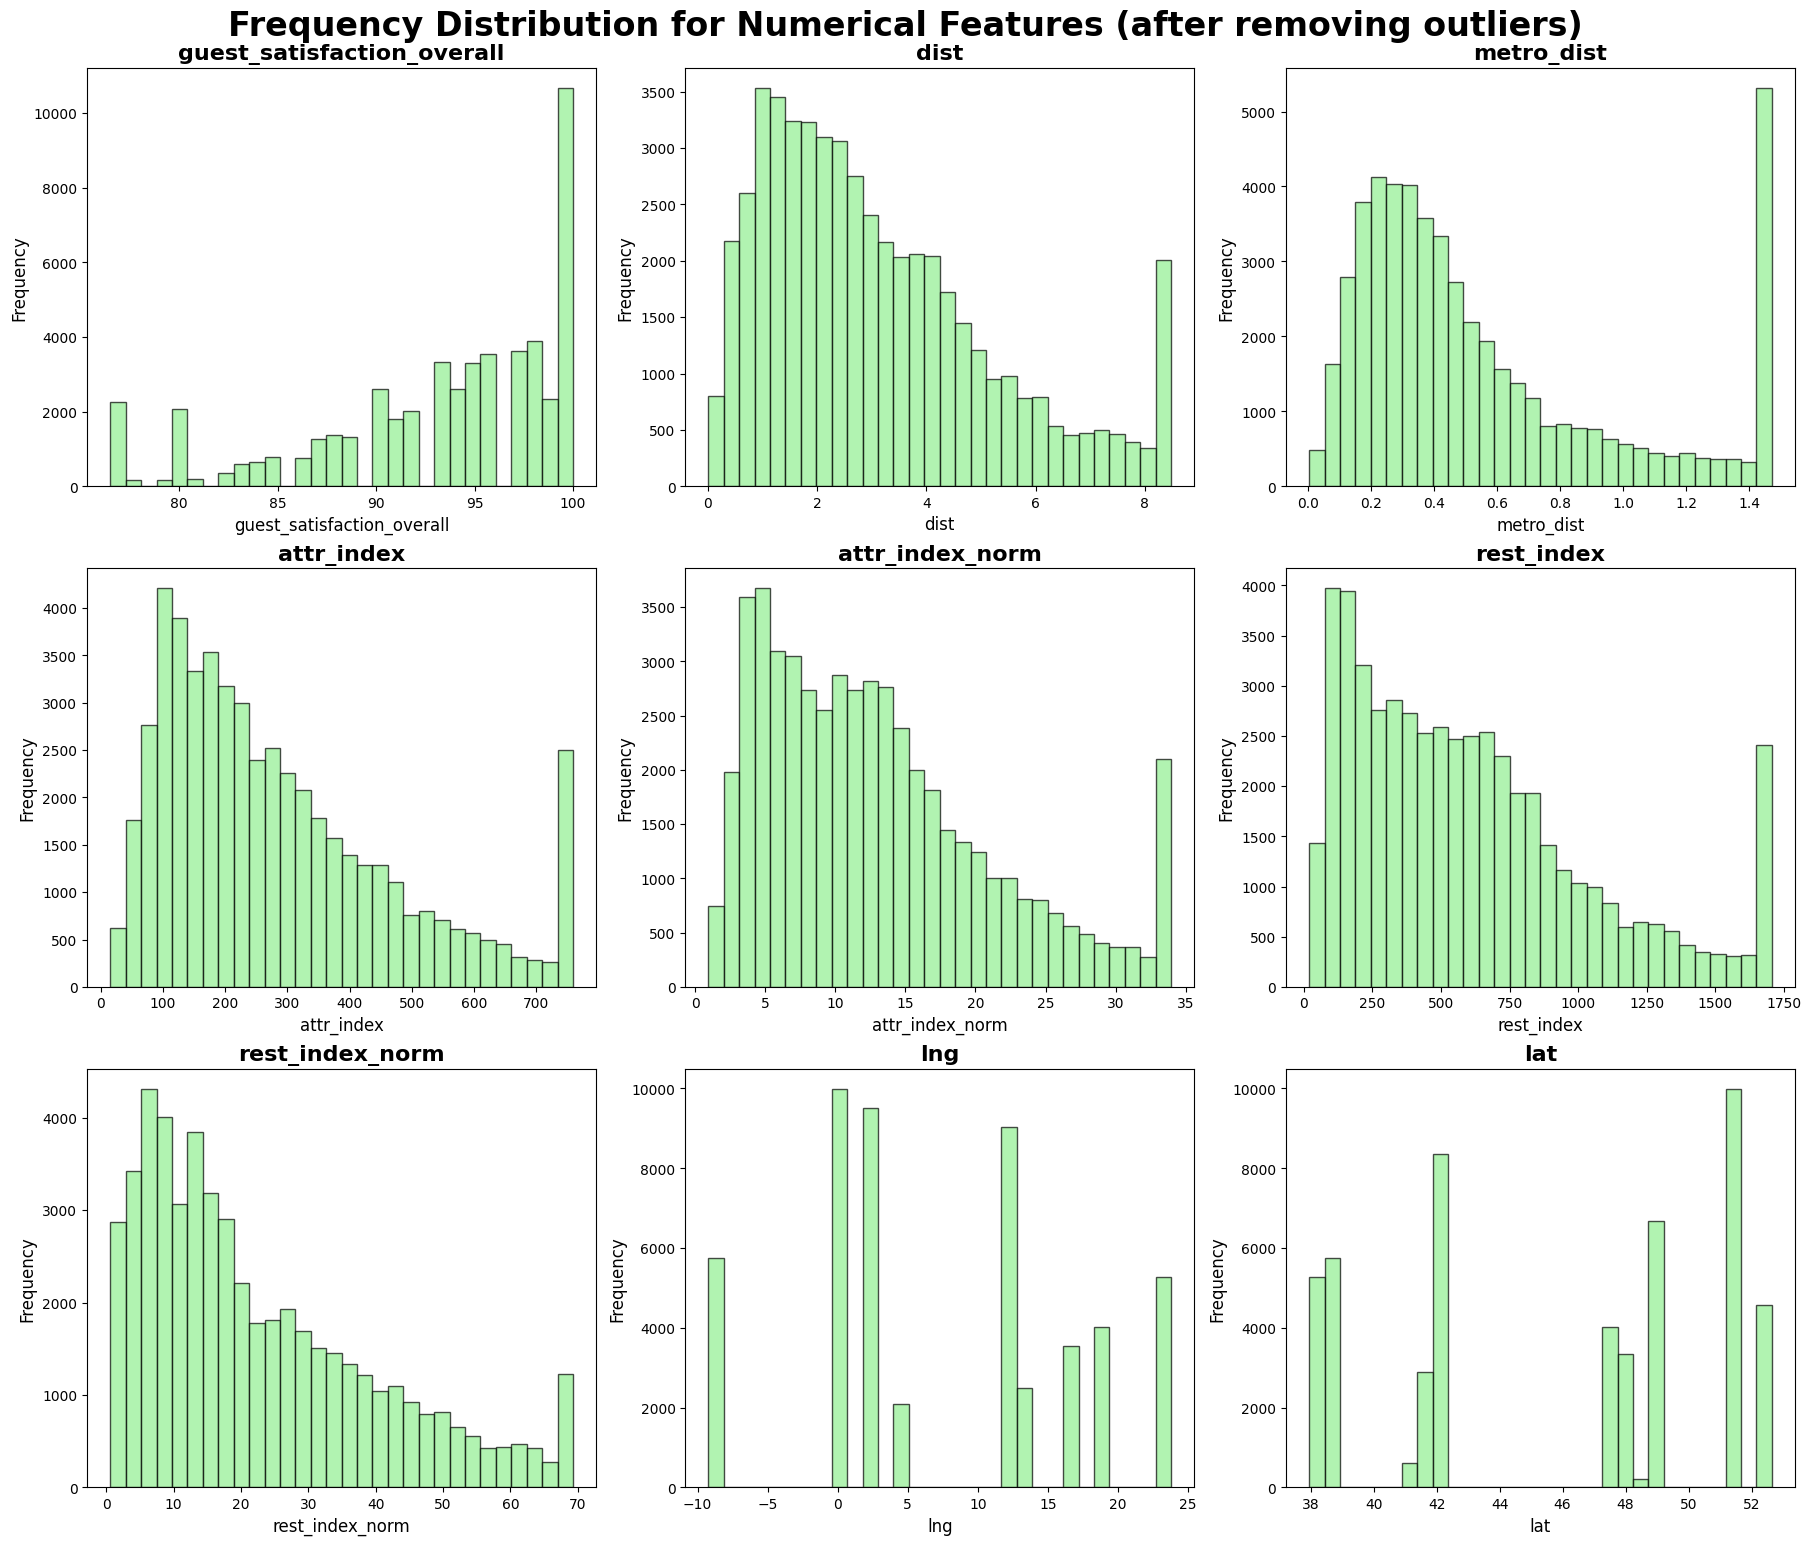

In [80]:
num_features = len(numerical_features)
num_rows = (num_features + 2) // 3 

fig, axes = plt.subplots(num_rows, 3, figsize=(18, 5 * num_rows), constrained_layout=True)
fig.suptitle("Frequency Distribution for Numerical Features (after removing outliers)", fontsize=24, fontweight='bold', y=1.02)
axes = axes.flatten()

for i, col in enumerate(numerical_features):
    df[col].plot(
        kind="hist", bins=30, color="lightgreen", alpha=0.7, edgecolor="black", ax=axes[i]
    )
    axes[i].set_title(f"{col}", fontsize=16, fontweight='bold')
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()


c:\Users\fizuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fizuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fizuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fizuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

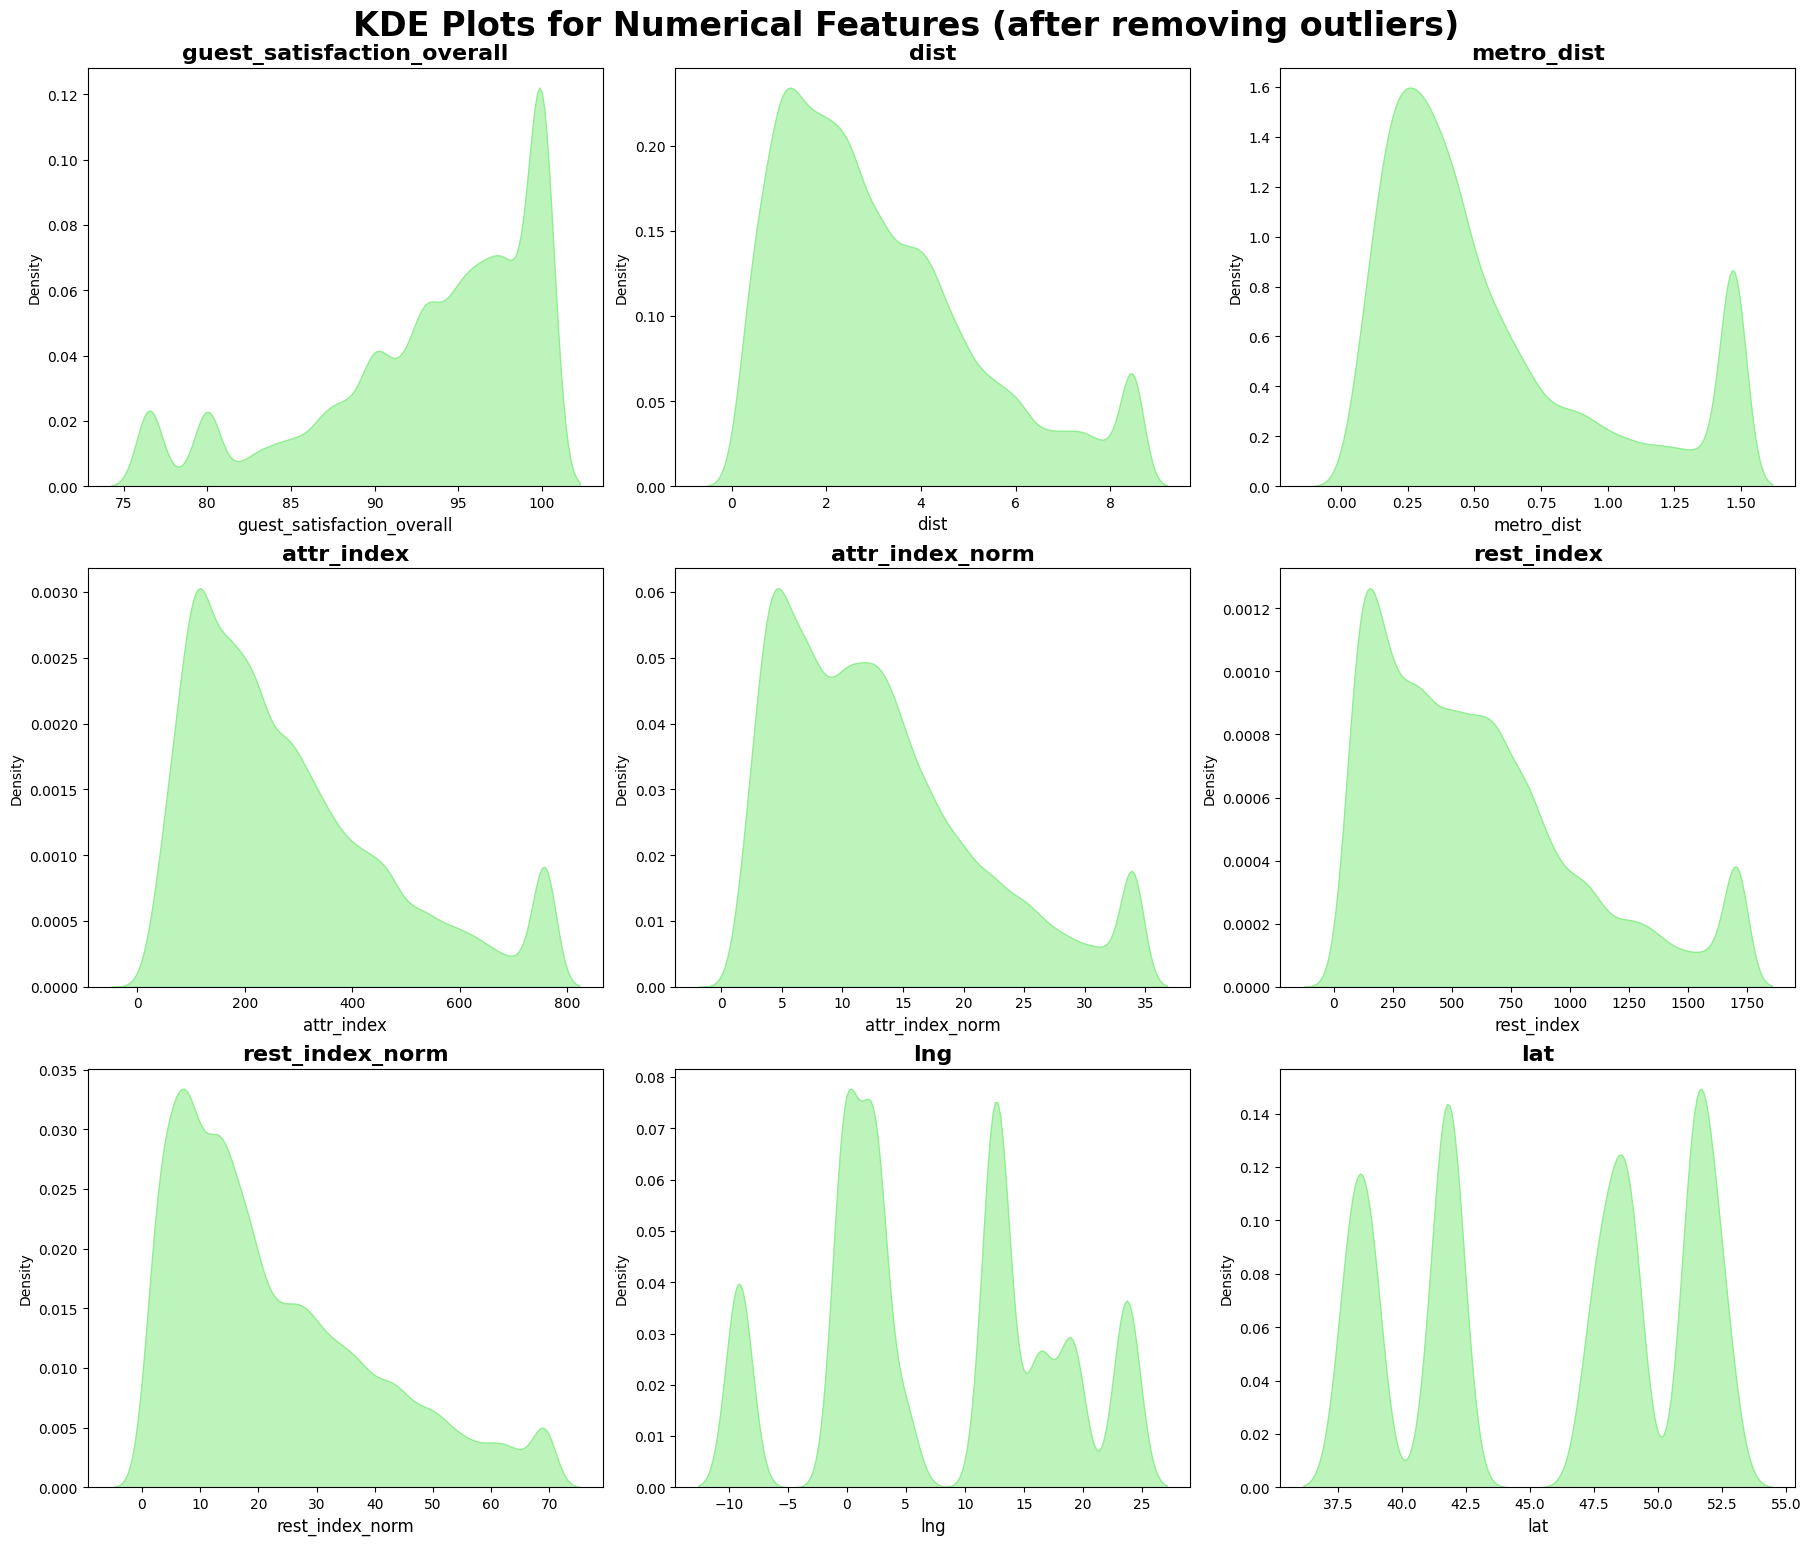

In [81]:
fig, axes = plt.subplots(num_rows, 3, figsize=(18, 5 * num_rows), constrained_layout=True)
fig.suptitle("KDE Plots for Numerical Features (after removing outliers)", fontsize=24, fontweight='bold', y=1.02)
axes = axes.flatten()
for i, col in enumerate(numerical_features):
    sns.kdeplot(data=df, x=col, ax=axes[i], fill=True, color="lightgreen", alpha=0.6)
    axes[i].set_title(f"{col}", fontsize=16, fontweight='bold')
    axes[i].set_xlabel(col, fontsize=12)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.show()

### Feature Transformation

Implement **log transformation** to handle skewness

In [82]:
# No zero or negative value exist so,
# numerical_features = ['guest_satisfaction_overall', 'dist', 'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm', 'lng', 'lat']
df['guest_satisfaction_overall'] = np.log(df['guest_satisfaction_overall'])
df['dist'] = np.log(df['dist'])
df['metro_dist'] = np.log(df['metro_dist'])
df['attr_index'] = np.log(df['attr_index'])
df['attr_index_norm'] = np.log(df['attr_index_norm'])
df['rest_index'] = np.log(df['rest_index'])
df['rest_index_norm'] = np.log(df['rest_index_norm'])
df['lng'] = np.log(df['lng'] + 1)
df['lat'] = np.log(df['lat'] + 1)

c:\Users\fizuf\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [83]:
# Check for NaN or infinite values explicitly
print(df[['lat', 'lng']].isna().sum())  # Should show 0 if no NaN values
print((df[['lat', 'lng']] == float('inf')).sum())  # Check for infinity
print((df[['lat', 'lng']] == float('-inf')).sum())  # Check for negative infinity

lat       0
lng    5763
dtype: int64
lat    0
lng    0
dtype: int64
lat    0
lng    0
dtype: int64


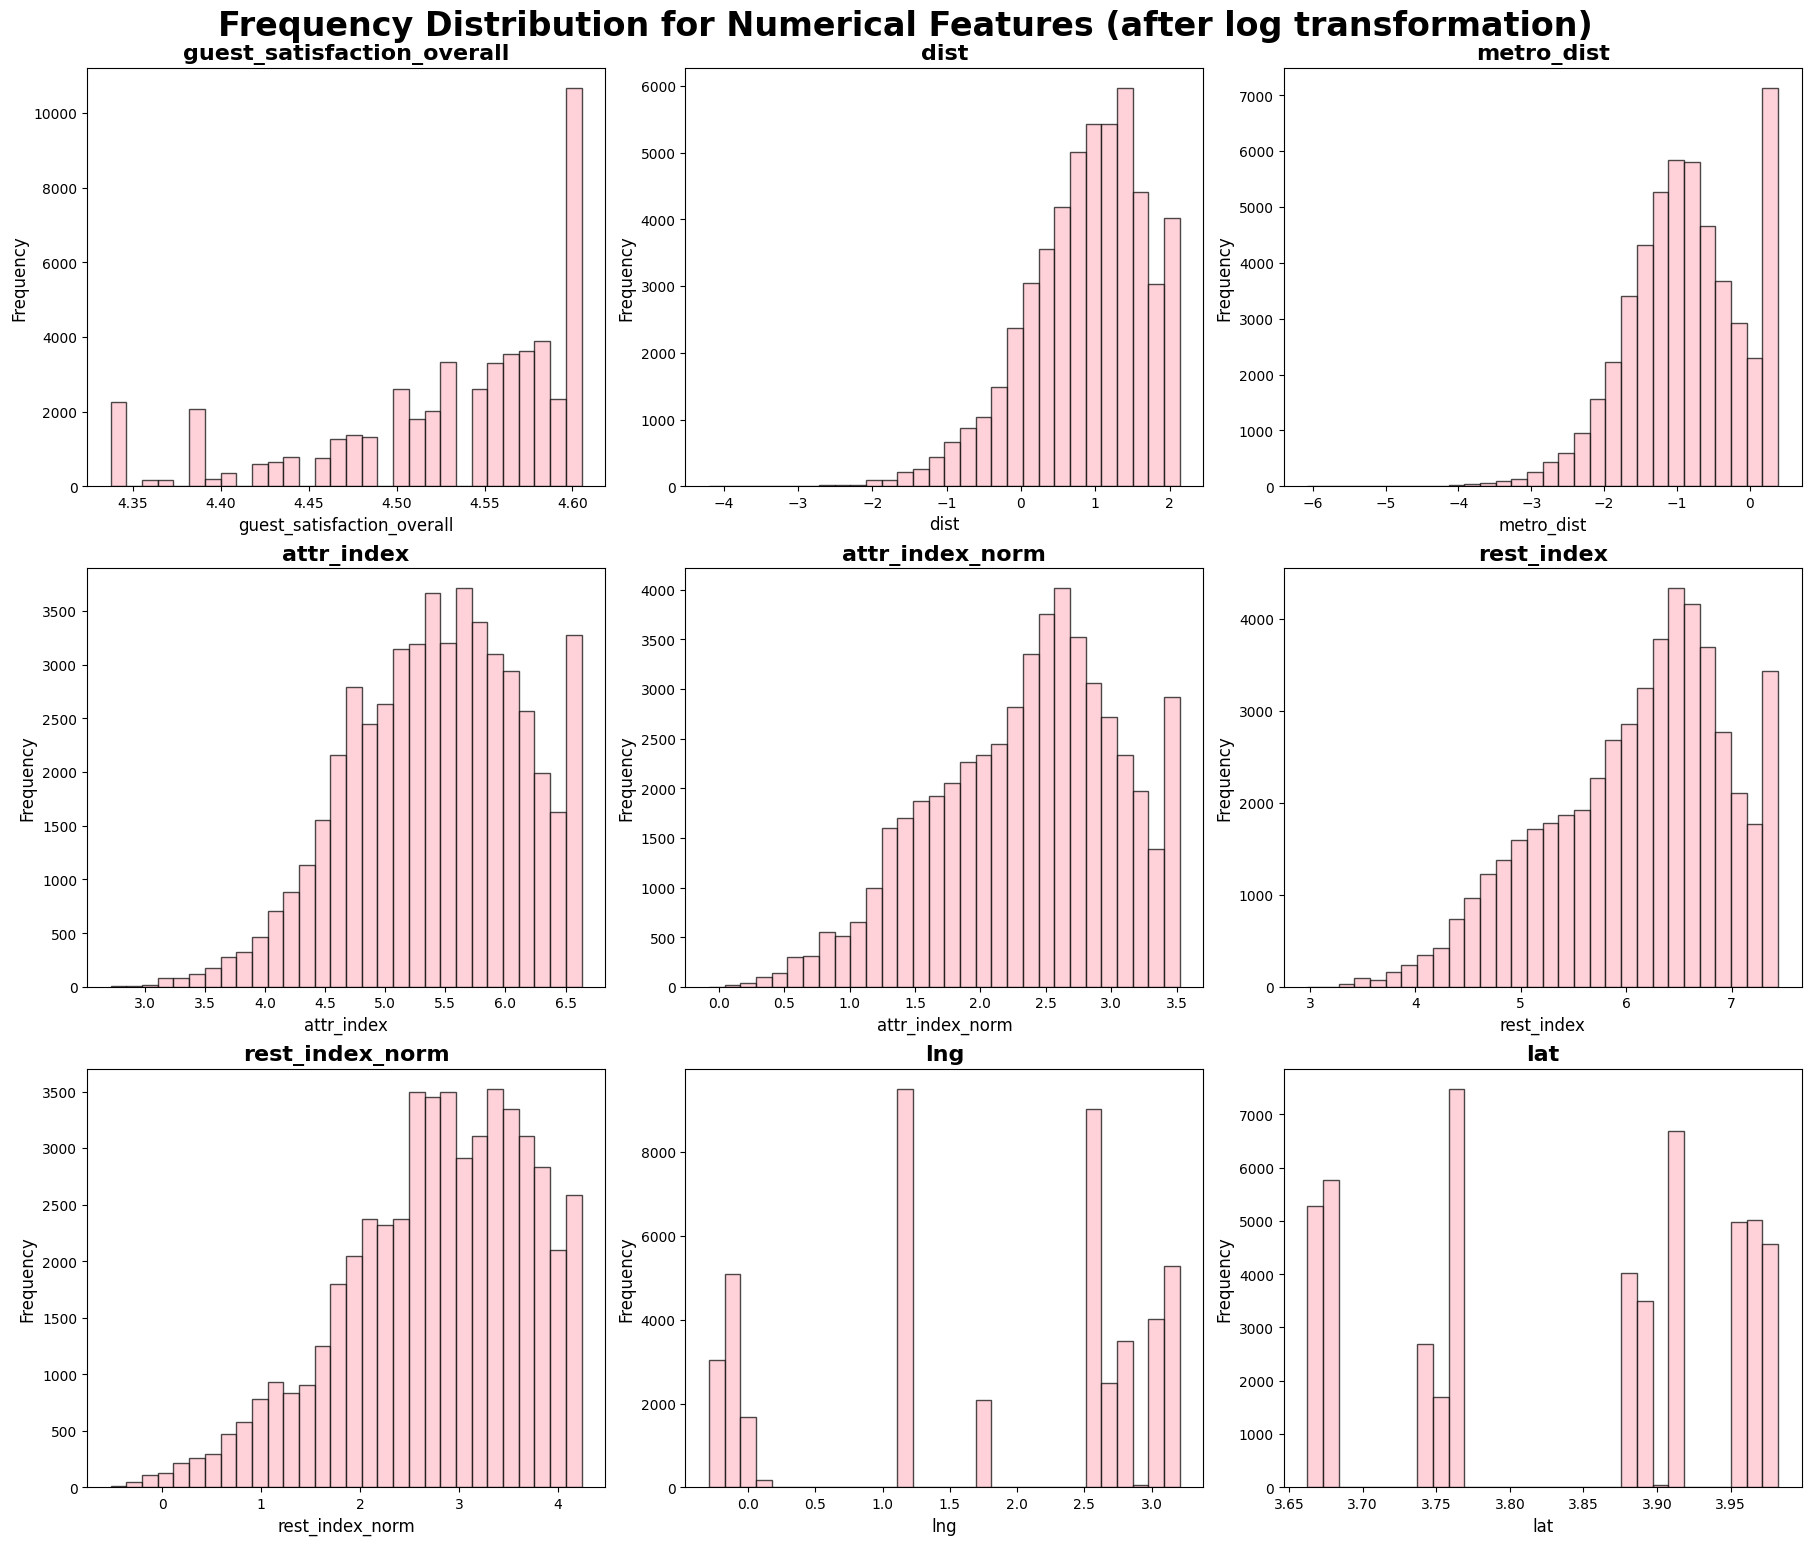

In [84]:
num_features = len(numerical_features)
num_rows = (num_features + 2) // 3 

fig, axes = plt.subplots(num_rows, 3, figsize=(18, 5 * num_rows), constrained_layout=True)
fig.suptitle("Frequency Distribution for Numerical Features (after log transformation)", fontsize=24, fontweight='bold', y=1.02)
axes = axes.flatten()

for i, col in enumerate(numerical_features):
    df[col].plot(
        kind="hist", bins=30, color="pink", alpha=0.7, edgecolor="black", ax=axes[i]
    )
    axes[i].set_title(f"{col}", fontsize=16, fontweight='bold')
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()


c:\Users\fizuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fizuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fizuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fizuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

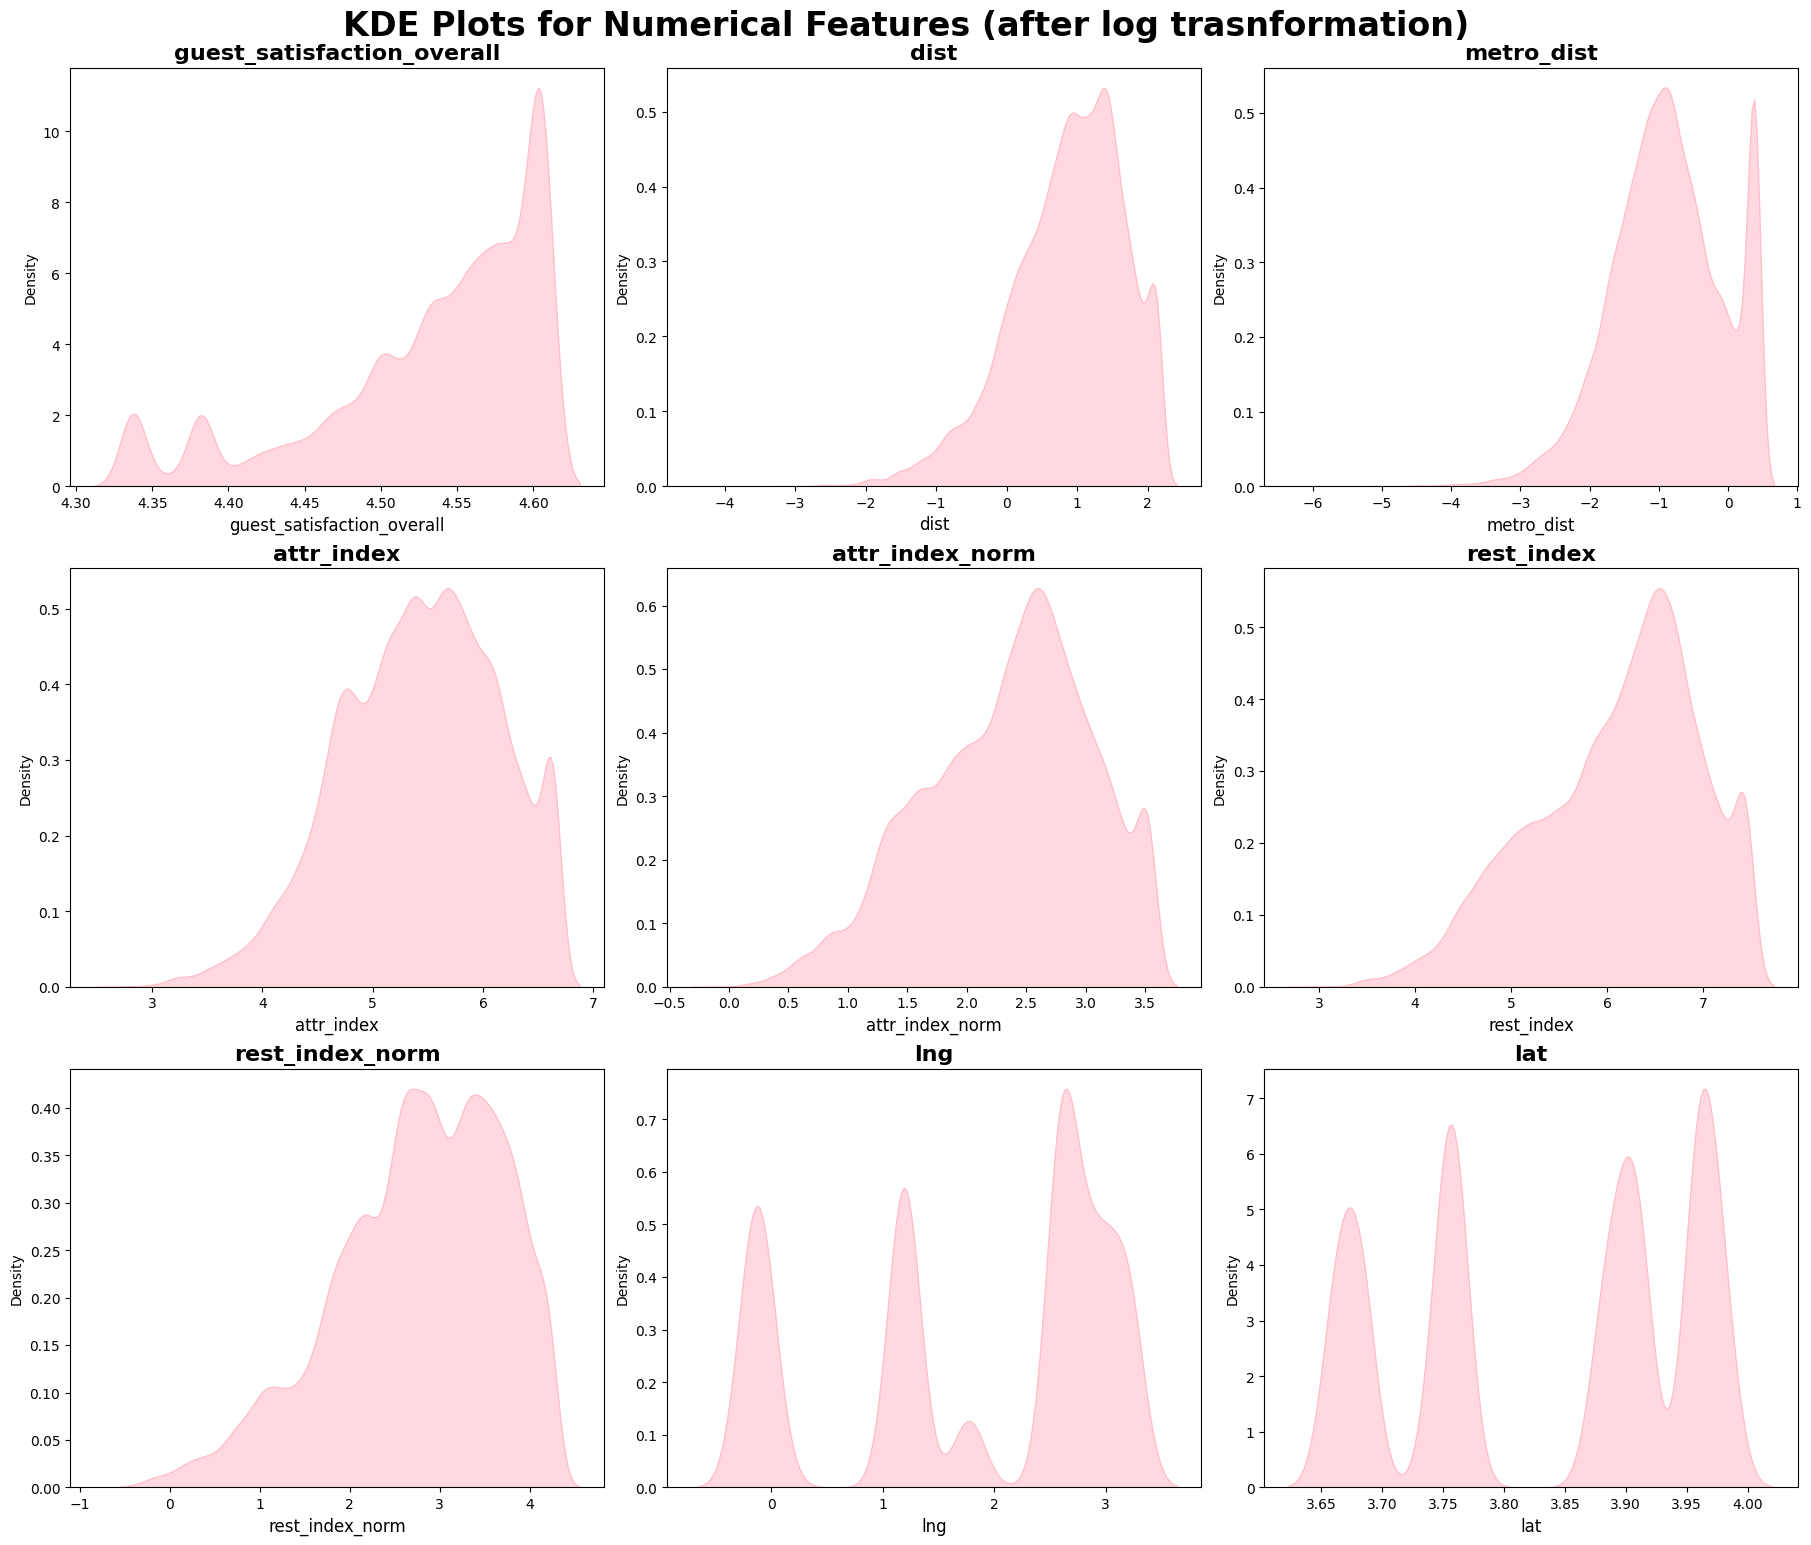

In [85]:
fig, axes = plt.subplots(num_rows, 3, figsize=(18, 5 * num_rows), constrained_layout=True)
fig.suptitle("KDE Plots for Numerical Features (after log trasnformation)", fontsize=24, fontweight='bold', y=1.02)
axes = axes.flatten()
for i, col in enumerate(numerical_features):
    sns.kdeplot(data=df, x=col, ax=axes[i], fill=True, color="pink", alpha=0.6)
    axes[i].set_title(f"{col}", fontsize=16, fontweight='bold')
    axes[i].set_xlabel(col, fontsize=12)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.show()

### Apply Binning For **Multimodal Features**

- `lng` has 3 modals
- `lat` has 4 modals

Apply K-Means Clustering to get new clustered features: `lat_clusters` and `lng_clusters`.

In [86]:
df = df.dropna(subset=['lat', 'lng'])

# Proceed with K-Means clustering after dropping missing values
kmeans_lat = KMeans(n_clusters=4, random_state=42)
df['lat_clusters'] = kmeans_lat.fit_predict(df[['lat']])

kmeans_lng = KMeans(n_clusters=3, random_state=42)
df['lng_clusters'] = kmeans_lng.fit_predict(df[['lng']])

# Get the centroids of the clusters
lat_centroids = kmeans_lat.cluster_centers_
lng_centroids = kmeans_lng.cluster_centers_

# Display the centroids
print("Latitude centroids:", lat_centroids)
print("Longitude centroids:", lng_centroids)

# Check the result with cluster assignments
print(df[['lat', 'lat_clusters', 'lng', 'lng_clusters']].head())



c:\Users\fizuf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\fizuf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Latitude centroids: [[3.89816189]
 [3.7559526 ]
 [3.96643986]
 [3.66307229]]
Longitude centroids: [[ 2.84212455]
 [ 1.29537716]
 [-0.1248711 ]]
        lat  lat_clusters       lng  lng_clusters
0  3.978143             2  1.775916             1
1  3.977330             2  1.774961             1
2  3.977081             2  1.787604             1
3  3.977373             2  1.773964             1
4  3.977344             2  1.775039             1


In [87]:
df.head(10)

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,is_weekend,lat_clusters,lng_clusters
0,194.033698,Private room,False,True,2,False,1,0,10,4.532599,...,4.365521,1.427126,4.587555,1.923734,1.775916,3.978143,Amsterdam,0,2,1
1,344.245776,Private room,False,True,4,False,0,0,8,4.442651,...,6.447585,3.509191,6.730159,4.066338,1.774961,3.977330,Amsterdam,0,2,1
2,264.101422,Private room,False,True,2,False,0,1,9,4.465908,...,4.321160,1.382765,4.557942,1.894121,1.787604,3.977081,Amsterdam,0,2,1
3,433.529398,Private room,False,True,4,False,0,1,9,4.499810,...,6.201062,3.262667,6.774262,4.110440,1.773964,3.977373,Amsterdam,0,2,1
4,485.552926,Private room,False,True,2,True,0,0,10,4.584967,...,6.315051,3.376656,6.703563,4.039742,1.775039,3.977344,Amsterdam,0,2,1
5,552.808567,Private room,False,True,3,False,0,0,8,4.605170,...,5.163579,2.225185,5.416996,2.753175,1.771045,3.977617,Amsterdam,0,2,1
6,215.124317,Private room,False,True,2,False,0,0,10,4.543295,...,5.299155,2.360761,5.492096,2.828275,1.777610,3.977492,Amsterdam,0,2,1
7,2771.307384,Entire home/apt,False,False,4,True,0,0,10,4.605170,...,5.341416,2.403021,5.606955,2.943134,1.772351,3.977576,Amsterdam,0,2,1
8,1001.804420,Entire home/apt,False,False,4,False,0,0,9,4.564348,...,4.665573,1.727179,4.896916,2.233094,1.768933,3.977844,Amsterdam,0,2,1
9,276.521454,Private room,False,True,2,False,1,0,10,4.477337,...,5.329103,2.390708,5.473494,2.809672,1.770876,3.976818,Amsterdam,0,2,1


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45944 entries, 0 to 51706
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   realSum                     45944 non-null  float64
 1   room_type                   45944 non-null  object 
 2   room_shared                 45944 non-null  bool   
 3   room_private                45944 non-null  bool   
 4   person_capacity             45944 non-null  int64  
 5   host_is_superhost           45944 non-null  bool   
 6   multi                       45944 non-null  int64  
 7   biz                         45944 non-null  int64  
 8   cleanliness_rating          45944 non-null  int64  
 9   guest_satisfaction_overall  45944 non-null  float64
 10  bedrooms                    45944 non-null  int64  
 11  dist                        45944 non-null  float64
 12  metro_dist                  45944 non-null  float64
 13  attr_index                  45944 no

## Categorical Features

In [91]:
categorical_features = ['room_type', 'room_shared', 'room_private', 'person_capacity', 'host_is_superhost', 'multi', 'biz', 'cleanliness_rating', 'bedrooms', 'city', 'is_weekend']

### Label Encoding

`room_shared`, `room_private`, `host_is_superhost`

In [92]:

df['room_shared'] = df['room_shared'].replace({False: 0, True: 1})
df['room_private'] = df['room_private'].replace({False: 0, True: 1})
df['host_is_superhost'] = df['host_is_superhost'].replace({False: 0, True: 1})

### One-Hot Encoding

`room_type`, `city`

In [94]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Sample DataFrame
df = pd.DataFrame({
    'room_type': ['Entire home/apt', 'Private room', 'Shared room', 'Entire home/apt'],
    'city': ['London', 'Rome', 'Paris', 'London']
})

# Initialize the encoder with drop_first=True to avoid dummy variable trap
encoder = OneHotEncoder(drop='first', sparse=False)

# Fit the encoder on both columns and transform them
encoded_columns = encoder.fit_transform(df[['room_type', 'city']])

# Convert the encoded data to DataFrame
encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(['room_type', 'city']))

# Concatenate the new one-hot encoded columns with the original DataFrame
df = pd.concat([df, encoded_df], axis=1)

# Drop the original categorical columns if needed
df.drop(['room_type', 'city'], axis=1, inplace=True)

print(df)


   room_type_Private room  room_type_Shared room  city_Paris  city_Rome
0                     0.0                    0.0         0.0        0.0
1                     1.0                    0.0         0.0        1.0
2                     0.0                    1.0         1.0        0.0
3                     0.0                    0.0         0.0        0.0


c:\Users\fizuf\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
